<a href="https://colab.research.google.com/github/Kyrillos1/Diabetes-Health-Indicators/blob/main/red_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Kerolous Ashraf Gmail
## ID: 2002015

In [42]:
#Packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('winequality-red.csv', sep=';')
print(f"Data has {df.shape[0]} Rows and {df.shape[1]} Features")
df.head()

Data has 1599 Rows and 12 Features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
pd.concat(
    {
        'Quality Value Counts': df['quality'].value_counts(),
        'Quality Value Counts Norm': df['quality'].value_counts(normalize=True)*100
    },axis=1)

,Quality Value Counts,Quality Value Counts Norm
5,681,42.589118
6,638,39.899937
7,199,12.445278
4,53,3.314572
8,18,1.125704
3,10,0.625391


In [30]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
pd.concat(
    {
        'Num': duplicate['quality'].value_counts(),
        'Normalized': duplicate['quality'].value_counts(normalize=True)*100
    },axis=1)


Duplicate Rows :  240


,Num,Normalized
5,104,43.333333
6,103,42.916667
7,32,13.333333
8,1,0.416667


In [ ]:
# df = df.drop_duplicates(subset=None, keep="first", inplace=False)

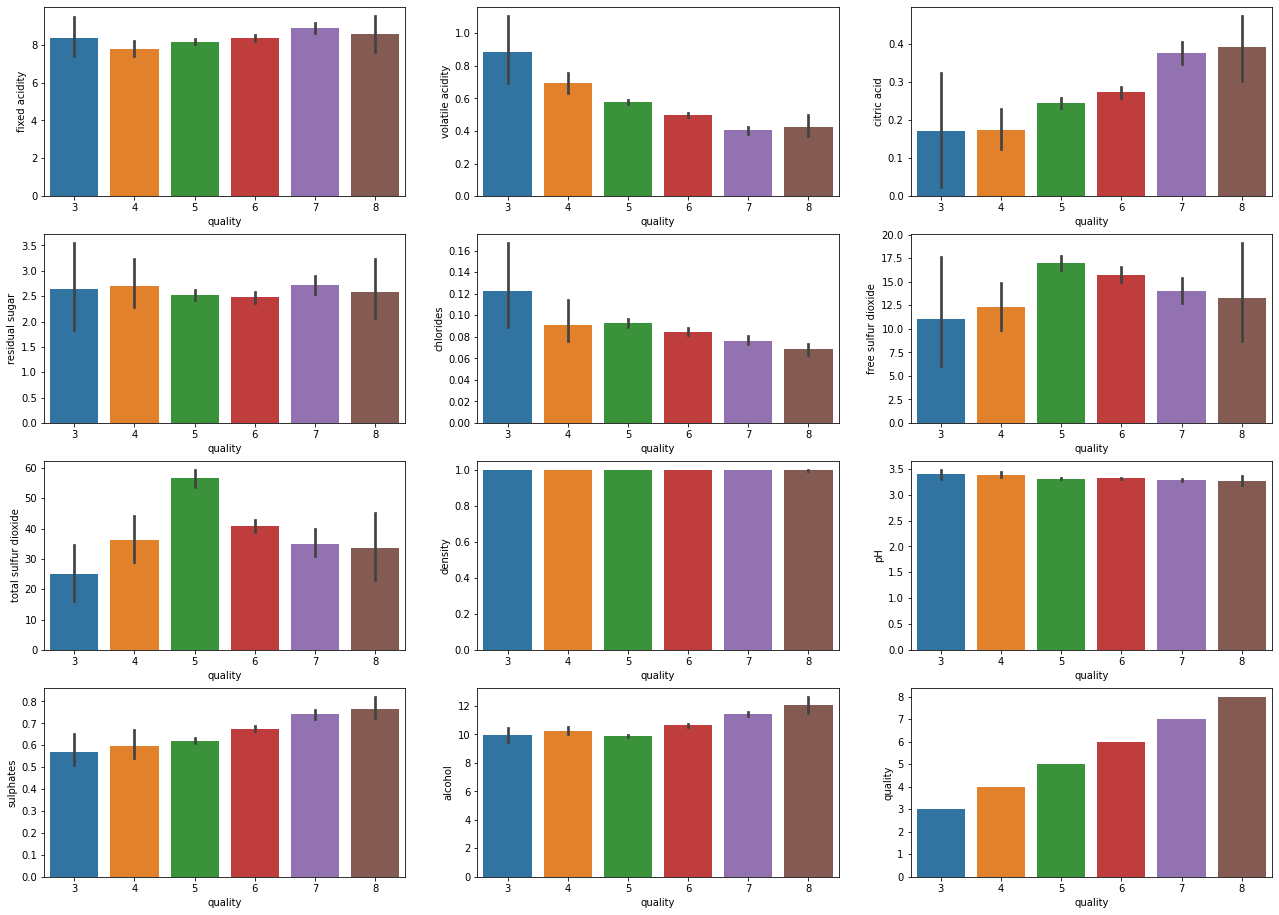

In [39]:
column_names=df.columns.values

number_of_column=len(column_names)

fig, axarr=plt.subplots(4,3, figsize=(22,16))
counter=0
for i in range(4):
  for j in range(3):
    sns.barplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
    counter+=1
    if counter==(number_of_column-1,):
      break

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

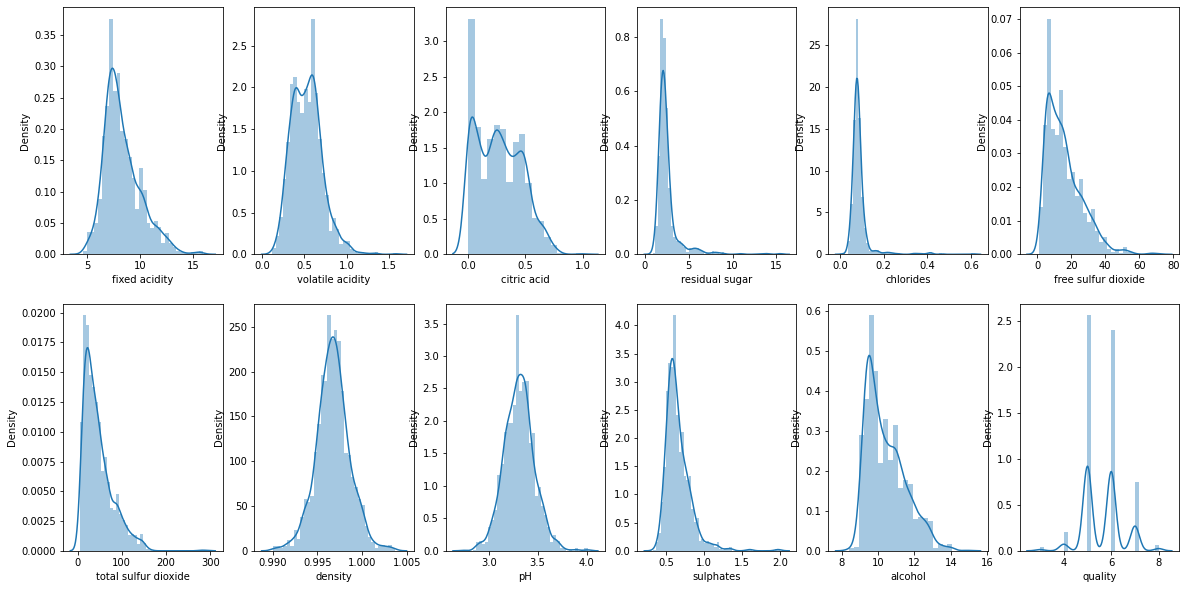

In [40]:
fig,ax = plt.subplots(ncols = 6, nrows = 2,figsize = (20,10))
ax = ax.flatten()
index = 0
for col in df.columns:
    sns.distplot(df[col], ax = ax[index])
    index+=1

In [41]:
x = df.drop(["quality"], axis =1)
y = df['quality']

In [45]:
scaler  =StandardScaler()
x = scaler.fit_transform(x)
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


array([[ 0.21852997,  0.90601191,  0.20039205, ...,  1.09426457,
         0.48302886,  1.10483337],
       [-1.27524919, -1.77549685,  0.66254621, ..., -0.39596939,
        -0.40216729,  1.38643512],
       [ 1.48249695, -0.76993107,  1.02199944, ..., -0.07200549,
         0.54204194, -0.58477711],
       ...,
       [-0.6432657 ,  0.51495855, -1.08336951, ...,  1.28864292,
        -0.69723268, -0.86637886],
       [-0.24109439, -1.83136161,  0.4057939 , ...,  0.05758008,
         0.83710732,  1.38643512],
       [-1.44760832, -1.32857872, -0.05636026, ...,  0.51112954,
        -0.69723268,  2.8883111 ]])

In [1]:
from tensorflow import keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=0.01873, input_shape=[11]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu"))
  model.add(keras.layers.Dense(1,activation='linear'))
  optimizer = keras.optimizers.Adam(lr=learning_rate)
  model.compile(optimizer ="adam",
                loss='mean_squared_error',
                metrics=['mse', 'mae']
                )
  return model
# model = keras.Sequential([
#     # keras.layers.BatchNormalization(input_shape=[11]),
#     keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.3),
#     keras.layers.Dense(30, activation='relu', kernel_initializer="he_normal"),
#     # keras.layers.BatchNormalization(),
#     keras.layers.Dense(1,activation='linear'),
# ])

In [2]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-2-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [4]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [1, 2],
"n_neurons": np.arange(20, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(x_train, y_train, epochs=100,
validation_split=0.1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_mse', patience=20)])

NameError: ignored

In [129]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

{'n_neurons': 75, 'n_hidden': 1}
-0.48362986246744794


In [125]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 78)                936       
                                                                 
 dense_116 (Dense)           (None, 78)                6162      
                                                                 
 dense_117 (Dense)           (None, 1)                 79        
                                                                 
Total params: 7,177
Trainable params: 7,177
Non-trainable params: 0
_________________________________________________________________


In [117]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


<ipython-input-117-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [122]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=100)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = keras_reg.fit(x_train,y_train, validation_split=0.2, batch_size = 256, epochs = 1000, callbacks=[checkpoint_cb, early_stopping])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/1000
4/4 [==============================] - 1s 72ms/step - loss: 33.2884 - mse: 33.2884 - mae: 5.7164 - val_loss: 30.2488 - val_mse: 30.2488 - val_mae: 5.4548
Epoch 2/1000
4/4 [==============================] - 0s 23ms/step - loss: 28.5944 - mse: 28.5944 - mae: 5.2892 - val_loss: 25.8881 - val_mse: 25.8881 - val_mae: 5.0357
Epoch 3/1000
4/4 [==============================] - 0s 18ms/step - loss: 24.3330 - mse: 24.3330 - mae: 4.8614 - val_loss: 21.8249 - val_mse: 21.8249 - val_mae: 4.6043
Epoch 4/1000
4/4 [==============================] - 0s 22ms/step - loss: 20.3358 - mse: 20.3358 - mae: 4.4160 - val_loss: 18.0044 - val_mse: 18.0044 - val_mae: 4.1500
Epoch 5/1000
4/4 [==============================] - 0s 21ms/step - loss: 16.6123 - mse: 16.6123 - mae: 3.9477 - val_loss: 14.4107 - val_mse: 14.4107 - val_mae: 3.6628
Epoch 6/1000
4/4 [==============================] - 0s 23ms/step - loss: 13.1703 - mse: 13.1703 - mae: 3.4559 - val_loss: 11.1177 - val_mse: 11.1177 - val_mae: 3.160